<a href="https://colab.research.google.com/github/SMKProj/WebScraping/blob/main/BlocketAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('bostad.txt', encoding='utf-8',error_bad_lines=False)

In [ ]:
data.head(3)

,Title,Location,Type,Rooms,Size (m²),Start,End,Price,Link
0,Ekensbergsvägen,Stockholm,Apartment,2.0,28,2023-10-01,2024-09-30,"SEK 12,500",https://bostad.blocket.se/p2/en/home/676664/
1,Reginavägen,Malmö,Terrace house,3.0,72,Now,Until further notice,"SEK 25,500",https://bostad.blocket.se/p2/en/home/676663/
2,Allmogevägen,Järfälla,Apartment,2.0,65,Now,Until further notice,"SEK 15,742",https://bostad.blocket.se/p2/en/home/429113/


In [ ]:
data['Price'] = data['Price'].str.lstrip('SEK')

In [ ]:
data.head(3)

,Title,Location,Type,Rooms,Size (m²),Start,End,Price,Link
0,Ekensbergsvägen,Stockholm,Apartment,2.0,28,2023-10-01,2024-09-30,"12,500",https://bostad.blocket.se/p2/en/home/676664/
1,Reginavägen,Malmö,Terrace house,3.0,72,Now,Until further notice,"25,500",https://bostad.blocket.se/p2/en/home/676663/
2,Allmogevägen,Järfälla,Apartment,2.0,65,Now,Until further notice,"15,742",https://bostad.blocket.se/p2/en/home/429113/


In [ ]:
data['Size (m²)'].unique()

array(['28', '72', '65', '82', '140', '70', '105', '62', '100', '42',
       '87', '16', '25', '48', '40', '31', '80', '75', '98', '36', '38',
       '24', '44', '56', '50', '30', '45', '20', '67', '115', '66', '85',
       '59', '22', '74', '55', '61', '81', '37', '68', '64', '43', '8',
       '104', '170', '32', '155', '33', '125', '79', '27', '110', '57',
       '106', '35', '63', '112', '96', '89', '78', '54', '69', '76', '39',
       '49', '107', '150', '95', '47', '90', '58', '116', '60', '108',
       '258', '97', '390', '127', '10', '130', '15', '93', '73', '84',
       '18', '178', '190', '12', '23', '149', '117', '34', '51', '53',
       '114', '17', '77', '88', '145', '120', '200', '160', '92', '52',
       '21', '13', '26', '11', '29', '41', '22 - 45', '7', '86', '83',
       '163', '99', '198', '128', '118', '144', '132', '162', '129',
       '70 - 103', '175', '400', '185', '220', '122', '166', '101', '14',
       '135', '102', '71', '255', '126', '245', '138', '235', '16

In [ ]:
char_to_replace = {'22 - 45': '34', '70 - 103': '87', '60 - 65' : '62'}
for key,value in char_to_replace.items():
  data['Size (m²)'] = data['Size (m²)'].str.replace(key,value)

In [ ]:
data['Price'] = data['Price'].str.strip()
data['Size (m²)'] = data['Size (m²)'].str.strip()


data['Price'] = [int(p.replace(',', '')) for p in data['Price']]
data['Size (m²)'] = [int(s) for s in data['Size (m²)']]


In [ ]:
data[data['Price']< 5000]

,Title,Location,Type,Rooms,Size (m²),Start,End,Price,Link
33,Tegnérgatan,Sävsjö,Apartment,1.0,50,Now,2023-11-01,4906,https://bostad.blocket.se/p2/en/home/676613/
48,Djurgårdsgatan,Sävsjö,Apartment,2.0,56,Now,Until further notice,4848,https://bostad.blocket.se/p2/en/home/629928/
51,Hemvägen,Växjö,Apartment,1.0,22,Now,Until further notice,4722,https://bostad.blocket.se/p2/en/home/676590/
53,Kullgatan,Vetlanda,Apartment,2.0,55,2024-01-01,Until further notice,4899,https://bostad.blocket.se/p2/en/home/667463/
87,Talbyvägen,Odensbacken,Apartment,1.0,35,2023-11-06,Until further notice,3613,https://bostad.blocket.se/p2/en/home/667576/
...,...,...,...,...,...,...,...,...,...
899,Kyrkogatan,Virserum,Apartment,1.0,35,Now,2025-04-30,3150,https://bostad.blocket.se/p2/en/home/675711/
904,Spiskroksvägen,Huddinge,Room in Duplex,1.0,15,2023-12-01,Until further notice,4198,https://bostad.blocket.se/p2/en/home/675707/
912,Månadsvägen,Järfälla,Room in Apartment,1.0,17,Now,Until further notice,4196,https://bostad.blocket.se/p2/en/home/675695/
919,Lyby,Hörby,Room in House,1.0,15,2023-12-01,Until further notice,4198,https://bostad.blocket.se/p2/en/home/675679/


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      950 non-null    object 
 1   Location   950 non-null    object 
 2   Type       950 non-null    object 
 3   Rooms      950 non-null    float64
 4   Size (m²)  950 non-null    int64  
 5   Start      950 non-null    object 
 6   End        950 non-null    object 
 7   Price      950 non-null    int64  
 8   Link       950 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 66.9+ KB


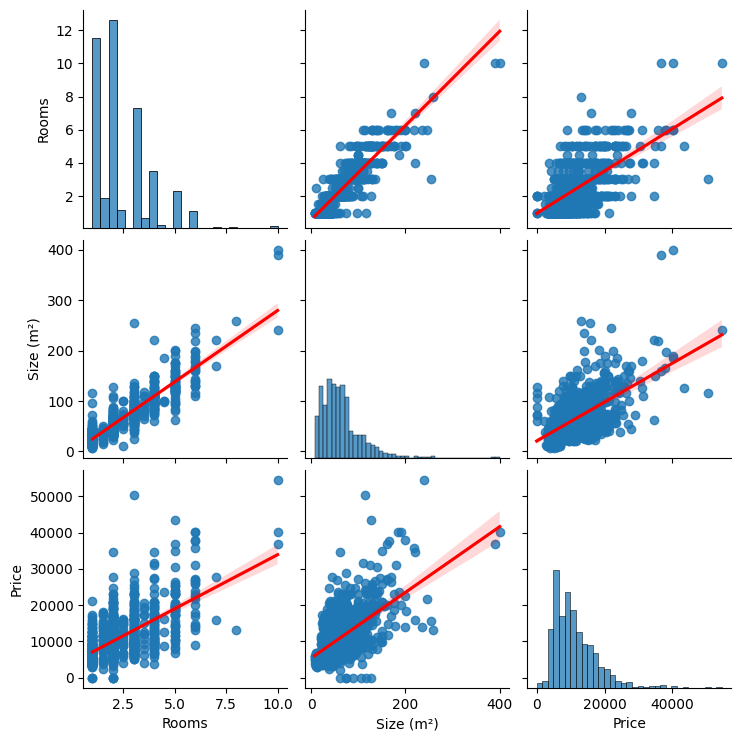

In [ ]:
sns.pairplot(data, kind="reg", plot_kws={'line_kws':{'color':'red'}})

In [ ]:
print('Correlation Value for Price and Size is: ', np.round((data['Price'].corr(data['Size (m²)'])*100),2) ,'%')

Correlation Value for Price and Size is:  59.05 %


In [ ]:
print('Correlation Value for Price and Size is: ', np.round((data['Rooms'].corr(data['Size (m²)'])*100),2),'%')

Correlation Value for Price and Size is:  89.73 %


**Lets categories our price column in to different lables**

In [ ]:
for p in range(len(data['Price'])):
  if data['Price'][p] < 5000:
    data['Price'][p] = 'Less then 5000'
  elif data['Price'][p] >= 5000 and data['Price'][p] < 10000:
    data['Price'][p] = 'Less then 10000'
  elif data['Price'][p] >= 10000 and data['Price'][p] < 15000:
    data['Price'][p] = 'Less then 15000'
  elif data['Price'][p] >= 15000 and data['Price'][p] < 20000:
    data['Price'][p] = 'Less then 20000'
  elif data['Price'][p] >= 20000:
    data['Price'][p] = 'Greater then 20000'


**Categorizing Size Column**

In [ ]:
for p in range(len(data['Size (m²)'])):
  if data['Size (m²)'][p] <= 30:
    data['Size (m²)'][p] = 'Small'
  elif data['Size (m²)'][p] > 30 and data['Size (m²)'][p] <= 60:
    data['Size (m²)'][p] = 'Medium'
  elif data['Size (m²)'][p] > 60 and data['Size (m²)'][p] <= 80:
    data['Size (m²)'][p] = 'Large'
  elif data['Size (m²)'][p] > 80:
    data['Size (m²)'][p] = 'Very Large'

In [ ]:
df = data[data['Location'].str.contains('|'.join(['Stockholm','Malmö','Göteborg','Solna']))]

In [ ]:
df.head(3)

,Title,Location,Type,Rooms,Size (m²),Start,End,Price,Link
0,Ekensbergsvägen,Stockholm,Apartment,2.0,Small,2023-10-01,2024-09-30,Less then 15000,https://bostad.blocket.se/p2/en/home/676664/
1,Reginavägen,Malmö,Terrace house,3.0,Large,Now,Until further notice,Greater then 20000,https://bostad.blocket.se/p2/en/home/676663/
7,Torsgatan,Stockholm,Apartment,2.0,Large,2023-10-01,2024-05-31,Greater then 20000,https://bostad.blocket.se/p2/en/home/676657/


In [ ]:
df_sthml = data[data['Location'].str.contains('Stockholm')]
df_malmo = data[data['Location'].str.contains('Malmö')]
df_gotheberg = data[data['Location'].str.contains('Göteborg')]
df_solna = data[data['Location'].str.contains('Solna')]

In [ ]:
df_sthml.groupby(['Price'])


In [ ]:
print('Stockholm Rooms: ',df_sthml['Rooms'].unique())
print('Malmo Rooms: ', df_malmo['Rooms'].unique())
print('Goteberg Rooms: ', df_gotheberg['Rooms'].unique())
print('Solna Rooms: ', df_solna['Rooms'].unique())

Stockholm Rooms:  [2.  1.5 1.  3.  5. ]
Malmo Rooms:  [ 3.  10.   2.   1.   1.5  2.5  6. ]
Goteberg Rooms:  [1.  2.  4.  3.  1.5 3.5]
Solna Rooms:  [2.  1.  2.5 3. ]


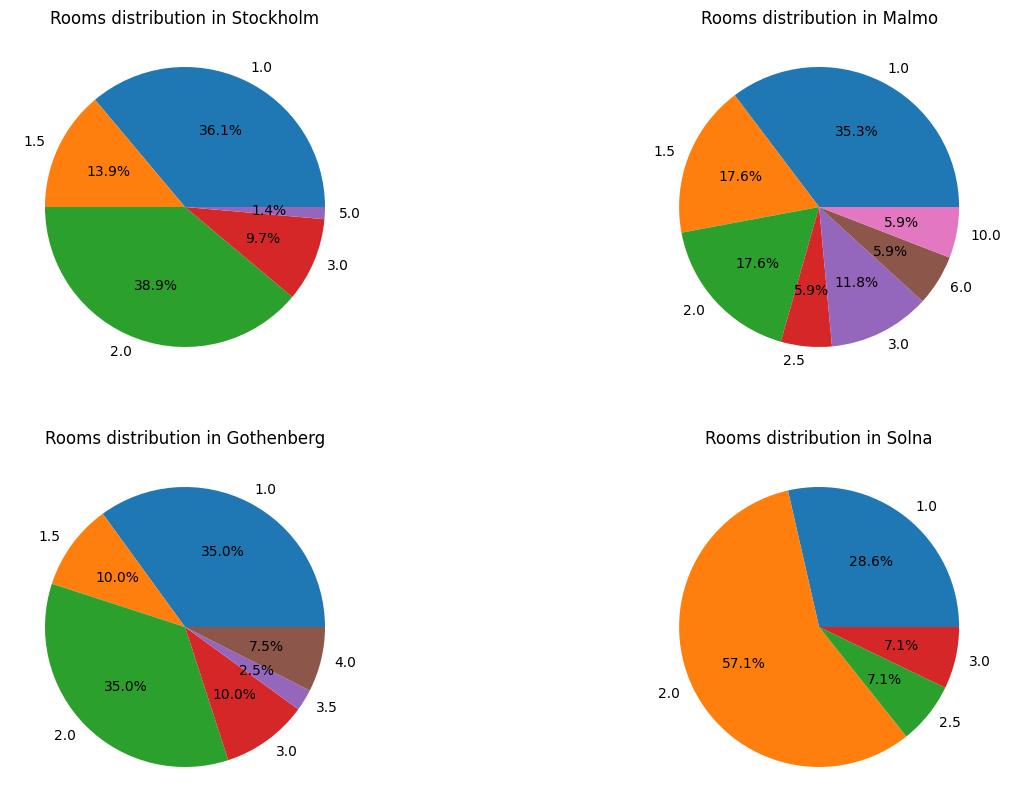

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,10))

sr = pd.crosstab(df_sthml['Rooms'], df_sthml.index).sum(axis=1).astype('float').plot(kind='pie', title='Rooms distribution in Stockholm', autopct='%1.1f%%',ax=axes[0,0])
mr = pd.crosstab(df_malmo['Rooms'], df_malmo.index).sum(axis=1).astype('float').plot(kind='pie', title='Rooms distribution in Malmo', autopct='%1.1f%%',ax=axes[0,1])
gr = pd.crosstab(df_gotheberg['Rooms'], df_gotheberg.index).sum(axis=1).astype('float').plot(kind='pie', title='Rooms distribution in Gothenberg', autopct='%1.1f%%',ax=axes[1,0])
snr = pd.crosstab(df_solna['Rooms'], df_solna.index).sum(axis=1).astype('float').plot(kind='pie', title='Rooms distribution in Solna', autopct='%1.1f%%',ax=axes[1,1])

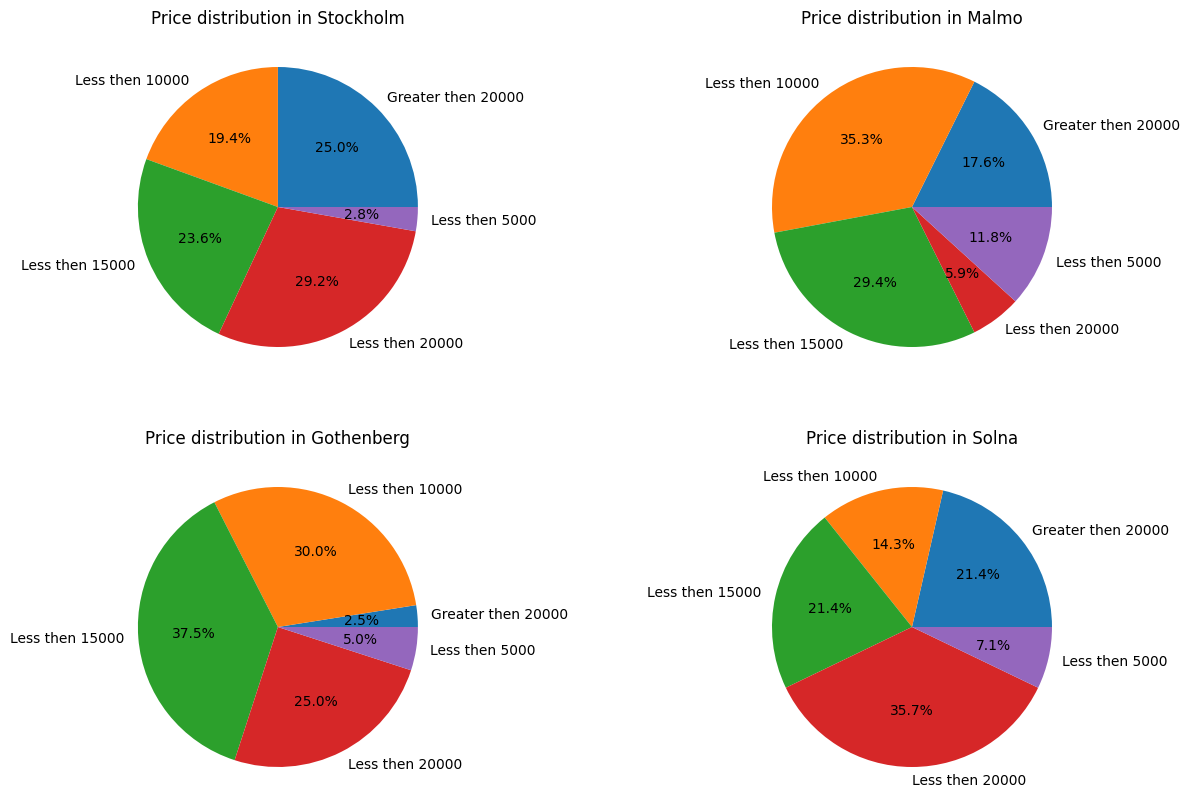

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,10))

sr = pd.crosstab(df_sthml['Price'], df_sthml.index).sum(axis=1).astype('float').plot(kind='pie', title='Price distribution in Stockholm', autopct='%1.1f%%',ax=axes[0,0])
mr = pd.crosstab(df_malmo['Price'], df_malmo.index).sum(axis=1).astype('float').plot(kind='pie', title='Price distribution in Malmo', autopct='%1.1f%%',ax=axes[0,1])
gr = pd.crosstab(df_gotheberg['Price'], df_gotheberg.index).sum(axis=1).astype('float').plot(kind='pie', title='Price distribution in Gothenberg', autopct='%1.1f%%',ax=axes[1,0])
snr = pd.crosstab(df_solna['Price'], df_solna.index).sum(axis=1).astype('float').plot(kind='pie', title='Price distribution in Solna', autopct='%1.1f%%',ax=axes[1,1])

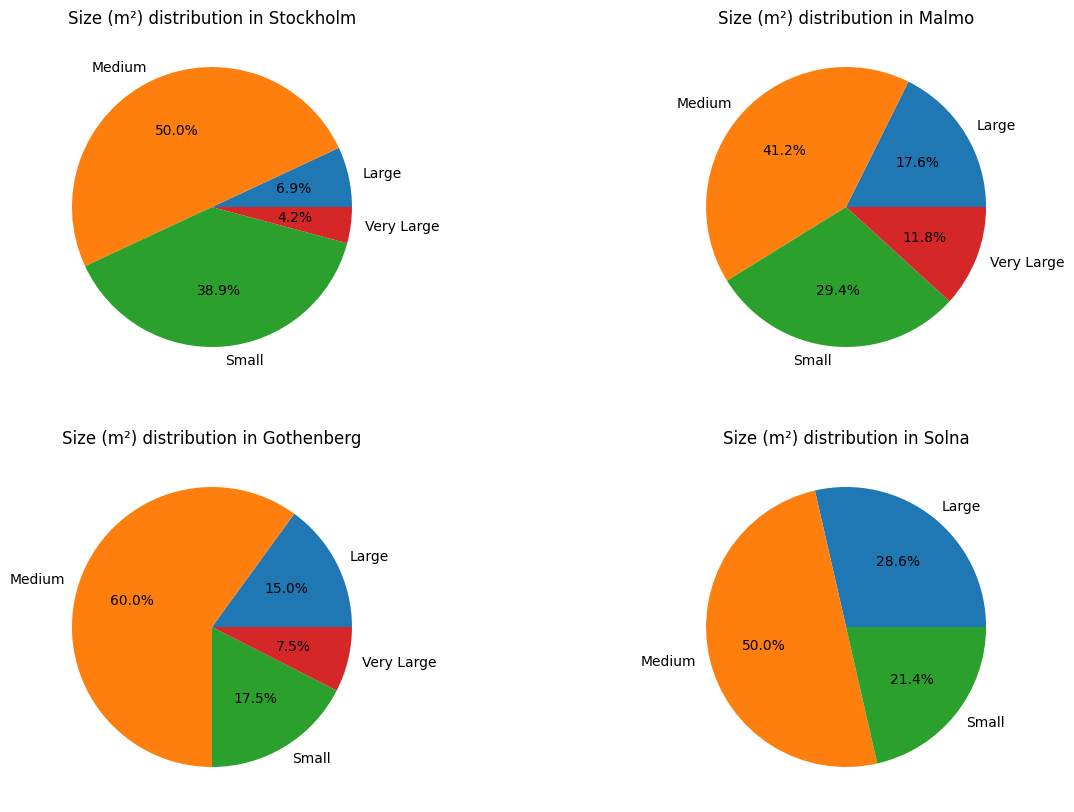

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,10))

sr = pd.crosstab(df_sthml['Size (m²)'], df_sthml.index).sum(axis=1).astype('float').plot(kind='pie', title='Size (m²) distribution in Stockholm', autopct='%1.1f%%',ax=axes[0,0])
mr = pd.crosstab(df_malmo['Size (m²)'], df_malmo.index).sum(axis=1).astype('float').plot(kind='pie', title='Size (m²) distribution in Malmo', autopct='%1.1f%%',ax=axes[0,1])
gr = pd.crosstab(df_gotheberg['Size (m²)'], df_gotheberg.index).sum(axis=1).astype('float').plot(kind='pie', title='Size (m²) distribution in Gothenberg', autopct='%1.1f%%',ax=axes[1,0])
snr = pd.crosstab(df_solna['Size (m²)'], df_solna.index).sum(axis=1).astype('float').plot(kind='pie', title='Size (m²) distribution in Solna', autopct='%1.1f%%',ax=axes[1,1])

Size (m²),Large,Medium,Small,Very Large
Price,,,,
Greater then 20000,4,11,0,3
Less then 10000,0,3,11,0
Less then 15000,0,7,10,0
Less then 20000,1,15,5,0
Less then 5000,0,0,2,0


Text(0.5, 0, '')

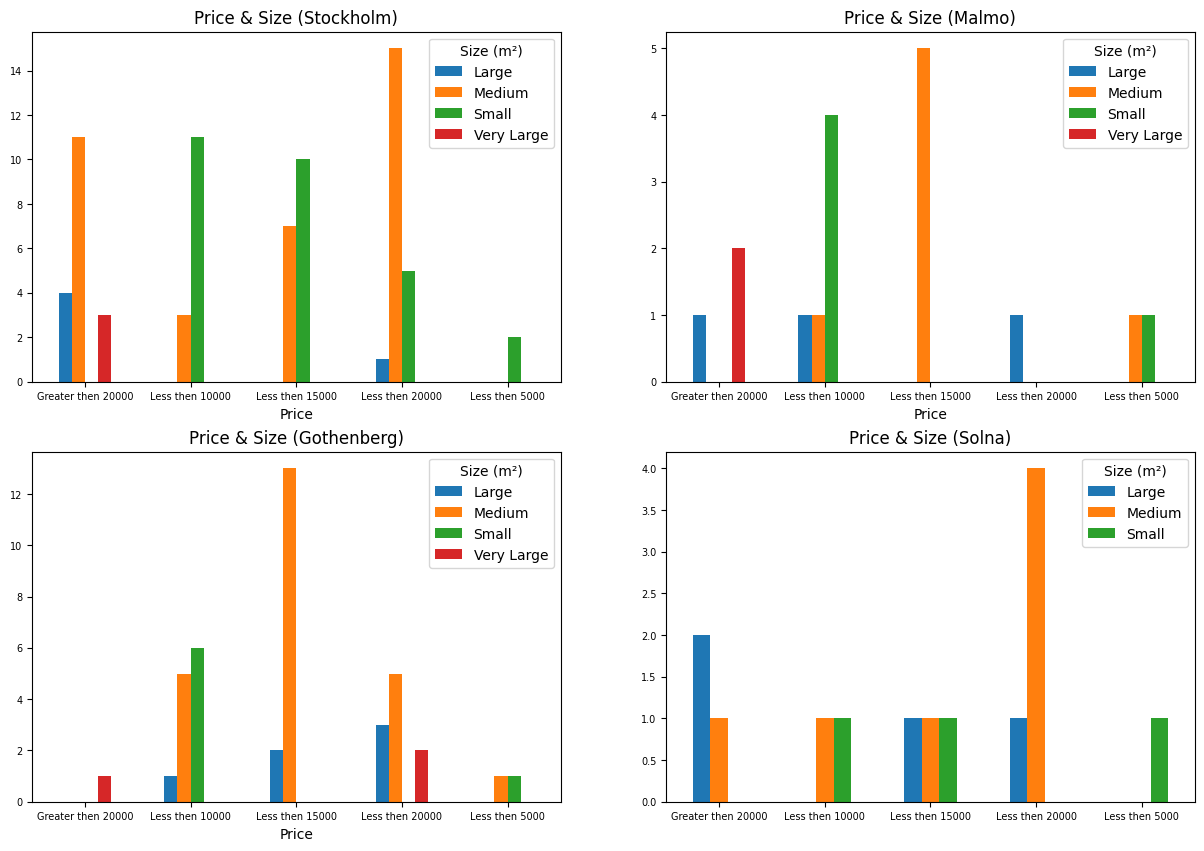

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
pd.crosstab(df_sthml['Price'], df_sthml['Size (m²)']).plot(kind='bar',rot=0,ax=axes[0,0], title='Price & Size (Stockholm)', fontsize=7)
plt.xlabel(None)
pd.crosstab(df_malmo['Price'], df_malmo['Size (m²)']).plot(kind='bar',rot=0,ax=axes[0,1], title='Price & Size (Malmo)', fontsize=7)
plt.xlabel(None)
pd.crosstab(df_gotheberg['Price'], df_gotheberg['Size (m²)']).plot(kind='bar',rot=0,ax=axes[1,0], title='Price & Size (Gothenberg)', fontsize=7)
plt.xlabel(None)
pd.crosstab(df_solna['Price'], df_solna['Size (m²)']).plot(kind='bar',rot=0, ax=axes[1,1], title='Price & Size (Solna)', fontsize=7)
plt.xlabel(None)